### Fitting for one sample

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
import os
import cmdstanpy
from cmdstanpy import cmdstan_path, CmdStanModel

In [3]:
#cmdstanpy.install_cmdstan

In [4]:
print(cmdstan_path())

C:\Users\dtn1\Anaconda3\envs\gsas-AustCalc\Library\bin\cmdstan


In [5]:
indata = pd.read_csv('intensity_table.csv')
#indata = pd.read_csv('/Users/creuzige/Documents/NIST_Research/GitHub/AusteniteCalculator/ExampleScripts/intensity_table.csv')

In [6]:
mydf = pd.DataFrame({
    'I':indata.int_fit,
    'R':indata.R_calc,
    'sigma_I':indata.u_int_fit,
    'phases':indata.Phase,
    'two_th':indata.two_theta
})

mydf['IR'] = mydf.I / mydf.R
mydf['sig_IR'] = mydf['sigma_I']/mydf.R

mydf = mydf.sort_values('phases').reset_index(drop=True)

<AxesSubplot:xlabel='two_th', ylabel='IR'>

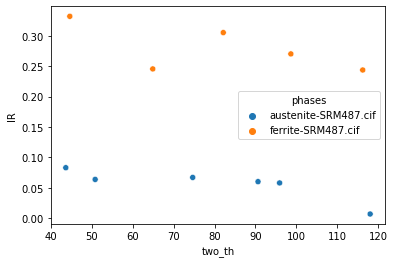

In [7]:
sns.scatterplot(data=mydf,x='two_th',y='IR',hue='phases')

In [8]:
mydf.head()

,I,R,sigma_I,phases,two_th,IR,sig_IR
0,21716.194,261157.488,168.301,austenite-SRM487.cif,43.593,0.083154,0.000644
1,7812.145,122379.402,123.253,austenite-SRM487.cif,50.777,0.063835,0.001007
2,4734.357,70554.804,103.257,austenite-SRM487.cif,74.651,0.067102,0.001464
3,4864.974,80763.209,110.421,austenite-SRM487.cif,90.633,0.060238,0.001367
4,1368.346,23555.357,80.239,austenite-SRM487.cif,95.910,0.058091,0.003406


In [9]:
mydf['phase_id'] = 0

In [10]:
unique_phases = np.unique(mydf.phases)

In [11]:
for ii, pn in enumerate(unique_phases):
    mydf.loc[mydf['phases'] == pn,'phase_id'] = ii+1

In [12]:
mydf.head()

,I,R,sigma_I,phases,two_th,IR,sig_IR,phase_id
0,21716.194,261157.488,168.301,austenite-SRM487.cif,43.593,0.083154,0.000644,1
1,7812.145,122379.402,123.253,austenite-SRM487.cif,50.777,0.063835,0.001007,1
2,4734.357,70554.804,103.257,austenite-SRM487.cif,74.651,0.067102,0.001464,1
3,4864.974,80763.209,110.421,austenite-SRM487.cif,90.633,0.060238,0.001367,1
4,1368.346,23555.357,80.239,austenite-SRM487.cif,95.910,0.058091,0.003406,1


### Stan starts here

In [13]:
stan_file = '../stan_files/one_sample.exe'
#stan_file = '../stan_files/one_sample.stan'
#stan_file = '../stan_files/one_sample'

#stan_file = '/Users/creuzige/Documents/NIST_Research/GitHub/AusteniteCalculator/stan_files/one_sample'

In [14]:
#cmdstan_path='/Users/creuzige/gsas2full/envs/stan-test/bin/cmdstan'

In [15]:
model = CmdStanModel(exe_file=stan_file)

In [16]:
#help(CmdStanModel)

In [17]:
os.listdir()

['.ipynb_checkpoints',
 'cif_composition_simulations.ipynb',
 'compute_structure_factor.ipynb',
 'GSASIIscript-LeBailSingleLikeGSAS.ipynb',
 'hello_world.exe',
 'hello_world.hpp',
 'hello_world.stan',
 'intensity_table.csv',
 'InteractionVolume-Plot.ipynb',
 'InteractionVolume.ipynb',
 'multiple_samples.exe',
 'multiple_samples.hpp',
 'multiple_samples.stan',
 'one_sample.exe',
 'one_sample.stan',
 'pf_uncertainty_conjugate_priors.ipynb',
 'pf_uncertainty_stan-AC.ipynb',
 'pf_uncertainty_with_pymc3.ipynb',
 'pf_uq_math.ipynb',
 'ScatteringFactor.ipynb',
 'XRDSystem-parameters.xlsx']

In [18]:
stan_data = {
    "N":mydf.shape[0],
    "N_phases":len(np.unique(mydf.phases)),
    "Y":mydf.IR,
    "phase":mydf.phase_id,
    "prior_scale":np.std(mydf.IR),
    "prior_location":np.mean(mydf.IR)
}

stan_init = {
    "mu_phase":np.mean(mydf.IR),
    "sigma_exp":np.std(mydf.IR)
}

In [19]:
start = time.time()
fit = model.sample(data=stan_data)
end = time.time()

10:23:01 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:23:02 - cmdstanpy - INFO - CmdStan done processing.
10:23:02 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter[1] is 0, but must be positive! (in 'C:/Users/dtn1/Documents/AusteniteCalc/austenitecalculator/ExampleScripts/one_sample.stan', line 18, column 4 to column 49)
Exception: normal_lpdf: Location parameter[7] is inf, but must be finite! (in 'C:/Users/dtn1/Documents/AusteniteCalc/austenitecalculator/ExampleScripts/one_sample.stan', line 18, column 4 to column 49)
Consider re-running with show_console=True if the above output is unclear!


In [20]:
fit.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,20.125800,0.052916,1.653890,16.919700,20.500800,22.053400,976.889,5035.51,1.00338
sigma_exp[1],0.034350,0.000349,0.014309,0.018652,0.030901,0.061612,1684.140,8681.13,1.00002
sigma_exp[2],0.054342,0.000725,0.027602,0.027113,0.047578,0.105373,1448.220,7465.03,1.00040
phase_mu[1],0.056818,0.000337,0.014336,0.034047,0.056678,0.079473,1810.780,9333.94,1.00353
phase_mu[2],0.278799,0.000603,0.026092,0.238690,0.278399,0.319842,1869.730,9637.76,1.00119


In [21]:
fit.draws_pd()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,sigma_exp[1],sigma_exp[2],phase_mu[1],phase_mu[2]
0,19.8523,0.907855,0.525947,3.0,7.0,0.0,-15.4867,0.028355,0.096546,0.049955,0.288925
1,19.7164,0.965170,0.525947,3.0,7.0,0.0,-18.0593,0.025232,0.055938,0.060613,0.228221
2,20.0050,1.000000,0.525947,3.0,7.0,0.0,-19.3238,0.030466,0.082715,0.055519,0.242441
3,20.8217,0.964926,0.525947,2.0,7.0,0.0,-19.5990,0.025527,0.060788,0.067927,0.253050
4,20.6705,0.896816,0.525947,3.0,7.0,0.0,-18.2036,0.038479,0.051411,0.044627,0.262350
...,...,...,...,...,...,...,...,...,...,...,...
3995,20.5770,1.000000,0.491535,3.0,7.0,0.0,-19.8172,0.029666,0.063161,0.051200,0.246129
3996,19.8393,0.867788,0.491535,2.0,7.0,0.0,-18.9833,0.023748,0.098731,0.052232,0.272227
3997,20.0900,0.998029,0.491535,2.0,7.0,0.0,-19.2038,0.022770,0.092496,0.059876,0.259597
3998,19.7465,0.901513,0.491535,3.0,7.0,0.0,-16.1764,0.049489,0.067683,0.077559,0.284555


In [32]:
import plotly.express as px
import re

In [38]:
def generate_pf_plot_and_table(fit,unique_phase_names):
    # fit from model.sample() in cmdstanpy
    mcmc_df = fit.draws_pd()
    mu_res = np.array(mcmc_df.loc[:,mcmc_df.columns.str.contains('phase_mu')])
    n_phase = mu_res.shape[1]
    
    row_sums = np.sum(mu_res,axis=1)
    mu_res_norm = mu_res

    for ii in range(n_phase):
        mu_res_norm[:,ii] = mu_res_norm[:,ii]/row_sums
        
    out_df = [None]*n_phase

    quantiles = np.zeros((n_phase,2))

    table = pd.DataFrame({
        'Phase':unique_phase_names,
        'PF Est':0,
        'PF Lwr95':0,
        'PF Upr95':0,
        'ExpErr':0
    })

    for ii,ph in enumerate(unique_phase_names):

        out_df[ii] = pd.DataFrame({
            'mu_samps':mu_res_norm[:,ii],
            'phase':unique_phase_names[ii]
        })

        quantiles[ii,:] = np.quantile(mu_res_norm[:,ii],(.025,.975))
        
        t_mu_samps = mcmc_df['phase_mu[' + str(ii+1) + ']']
        t_sigexp_samps = mcmc_df['sigma_exp[' + str(ii+1) + ']']
        
        table.loc[table['Phase'] == ph,'PF Est'] = np.mean(mu_res_norm[:,ii])
        table.loc[table['Phase'] == ph,'PF Lwr95'] = np.quantile(mu_res_norm[:,ii],.025)
        table.loc[table['Phase'] == ph,'PF Upr95'] = np.quantile(mu_res_norm[:,ii],.975)
        table.loc[table['Phase'] == ph,'ExpErr'] = np.mean(t_sigexp_samps)
    
    if 'sigma_sample' in mcmc_df.columns:
        table['sigma_sample'] = np.mean(mcmc_df['sigma_sample'])

    out_df = pd.concat(out_df,axis=0).reset_index(drop=True)
    
    quantiles = quantiles.flatten()
    
    # figure
    fig = px.histogram(out_df,x='mu_samps',color='phase',opacity=.75)
    
    for ii in range(len(quantiles)):
        fig.add_vline(quantiles[ii],opacity=.5,line_dash='dash')

    # table

    return fig, table

In [40]:
fig,table = generate_pf_plot_and_table(fit,pd.unique(mydf.phases))
fig.show()
table

,Phase,PF Est,PF Lwr95,PF Upr95,ExpErr
0,austenite-SRM487.cif,0.168799,0.087313,0.245421,0.034350
1,ferrite-SRM487.cif,0.831201,0.754579,0.912687,0.054342


### Multiple samples

In [41]:
multiple_df = pd.concat((mydf.copy(),mydf.copy(),mydf.copy())).reset_index(drop=True)
multiple_df['sample_id'] = np.repeat((0,1,2),11)
np.random.seed(123)

for ii in range(3):
    multiple_df.loc[multiple_df['sample_id']==ii,'I'] = multiple_df['I'].loc[multiple_df['sample_id']==ii]*(1+ii/2)
    
multiple_df['I'] = multiple_df['I'] + np.random.normal(0,multiple_df['I']/10,multiple_df.shape[0])
multiple_df['IR'] = multiple_df['I']/multiple_df['R']

In [42]:
multiple_df['sample_id'] = multiple_df['sample_id'] + 1

In [43]:
multiple_df.head()

,I,R,sigma_I,phases,two_th,IR,sig_IR,phase_id,sample_id
0,19358.617521,261157.488,168.301,austenite-SRM487.cif,43.593,0.074126,0.000644,1,1
1,8591.285724,122379.402,123.253,austenite-SRM487.cif,50.777,0.070202,0.001007,1,1
2,4868.329123,70554.804,103.257,austenite-SRM487.cif,74.651,0.069001,0.001464,1,1
3,4132.165538,80763.209,110.421,austenite-SRM487.cif,90.633,0.051164,0.001367,1,1
4,1289.173466,23555.357,80.239,austenite-SRM487.cif,95.910,0.054730,0.003406,1,1


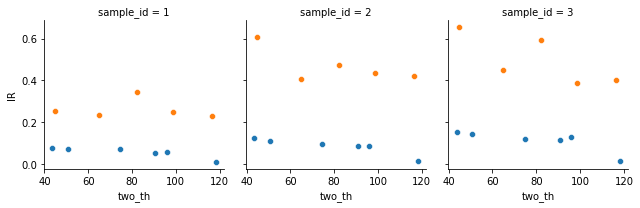

In [44]:
#multiple_df
g = sns.FacetGrid(multiple_df,col='sample_id',hue='phases')
g.map(sns.scatterplot,'two_th','IR')

### Stan starts here

In [48]:
stan_file = '../stan_files/multiple_samples.exe'

In [49]:
model = CmdStanModel(exe_file=stan_file)

In [50]:
stan_data = {
    "N":multiple_df.shape[0],
    "N_samples":len(np.unique(multiple_df.sample_id)),
    "N_phases":len(np.unique(multiple_df.phases)),
    "Y":multiple_df.IR,
    "phase":multiple_df.phase_id,
    "group":multiple_df.sample_id,
    "prior_scale":np.std(multiple_df.IR),
    "prior_location":np.mean(multiple_df.IR)
}

stan_init = {
    "mu_phase":np.mean(multiple_df.IR),
    "sigma_exp":np.std(multiple_df.IR),
    "sigma_sample":np.std(multiple_df.IR),
    "group_effect":0
}

In [51]:
start = time.time()
fit = model.sample(data=stan_data,
                   #inits=stan_init,
                   chains=4,
                   iter_warmup=1000, 
                   iter_sampling=1000)
end = time.time()

10:38:33 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:38:34 - cmdstanpy - INFO - CmdStan done processing.
10:38:34 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/dtn1/Documents/AusteniteCalc/austenitecalculator/ExampleScripts/multiple_samples.stan', line 32, column 8 to column 91)
Consider re-running with show_console=True if the above output is unclear!
10:38:34 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 3 divergent transitions (0.3%)
	Chain 2 had 8 divergent transitions (0.8%)
	Chain 4 had 2 divergent transitions (0.2%)
	Use function "diagnose()" to see further information.


In [52]:
fit.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,68.176800,0.077414,2.334090,63.840900,68.574000,71.233000,909.068,1478.160,1.002270
sigma_sample,0.069001,0.001922,0.054585,0.016408,0.054046,0.173429,806.576,1311.510,1.001820
sigma_exp[1],0.042739,0.000227,0.009012,0.030872,0.041358,0.058904,1576.150,2562.840,0.999327
sigma_exp[2],0.127361,0.000681,0.027917,0.090299,0.123296,0.178966,1682.080,2735.090,1.001420
phase_mu[1],0.086952,0.001929,0.038561,0.024584,0.084579,0.156904,399.402,649.434,1.010410
phase_mu[2],0.413057,0.002029,0.050807,0.333046,0.410558,0.498312,627.084,1019.650,1.007260
group_effect[1],-0.038502,0.002099,0.041534,-0.113876,-0.032761,0.020750,391.651,636.831,1.011530
group_effect[2],0.003063,0.001853,0.039067,-0.066833,0.004541,0.066159,444.686,723.066,1.007930
group_effect[3],0.024710,0.001900,0.039931,-0.041992,0.024767,0.090690,441.567,717.995,1.008200


In [47]:
end - start

1.2190110683441162

In [53]:
fig,table = generate_pf_plot_and_table(fit,pd.unique(mydf.phases))
fig.show()
table

,Phase,PF Est,PF Lwr95,PF Upr95,ExpErr,sigma_sample
0,austenite-SRM487.cif,0.167197,0.040798,0.267752,0.042739,0.069001
1,ferrite-SRM487.cif,0.832803,0.732248,0.959202,0.127361,0.069001
